# 風配図（wind rose）

風配図はある地点・ある期間の風の風向・風速の頻度を表した図である。

今回は大阪管区気象台の2018年の風向・風速データを用いて風配図を作ってみる。

In [1]:
# Libraries
import numpy as np
from pandas import read_csv, to_datetime
from matplotlib import pyplot as plt
from IPython.display import display # pandas表示用
from warnings import simplefilter # 風向を数字に変換する際に出るWarningを無視
simplefilter('ignore')

In [2]:
# データの中身
f = read_csv('./osaka_wind.csv')
f['Time'] = to_datetime(f['Time'])
display(f[0:5])

,Time,WS,WD
0,2018-01-01 01:00:00,1.5,北西
1,2018-01-01 02:00:00,0.9,東
2,2018-01-01 03:00:00,1.2,南東
3,2018-01-01 04:00:00,1.1,東北東
4,2018-01-01 05:00:00,1.0,東南東


In [3]:
# 風向を0（北）～15（北北西）へ変更する
kanji = ['北', '北北東', '北東', '東北東', '東', '東南東', '南東', '南南東', '南', '南南西', '南西', '西南西', '西', '西北西', '北西', '北北西']
for i, k in enumerate(kanji):
    f['WD'][f['WD'] == k] = i
f = f[f['WS'] >= 0.5]
display(f[0:5])

,Time,WS,WD
0,2018-01-01 01:00:00,1.5,14
1,2018-01-01 02:00:00,0.9,4
2,2018-01-01 03:00:00,1.2,6
3,2018-01-01 04:00:00,1.1,3
4,2018-01-01 05:00:00,1.0,5


In [4]:
# 2次元ヒストグラムの作成
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
H = ax.hist2d(f['WS'], f['WD'], range=[[0, 20], [0, 16]], bins=[4, 16])
plt.close('all')
print(H[0]) # 2d hist
print(H[1]) # x edges
print(H[2]) # y edges

[[1.341e+03 1.437e+03 5.280e+02 2.160e+02 1.220e+02 1.350e+02 1.430e+02
  2.120e+02 3.300e+02 4.810e+02 8.220e+02 9.030e+02 4.350e+02 3.090e+02
  3.240e+02 4.740e+02]
 [4.500e+01 4.200e+01 2.500e+01 1.400e+01 1.600e+01 1.200e+01 1.000e+00
  0.000e+00 6.000e+00 8.300e+01 3.300e+01 8.600e+01 1.600e+01 2.000e+00
  3.000e+00 5.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 2.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]
 [0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
  0.000e+00 0.000e+00]]
[ 0.  5. 10. 15. 20.]
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16.]


In [5]:
# percentageに変換
per = H[0] / H[0].sum() * 100

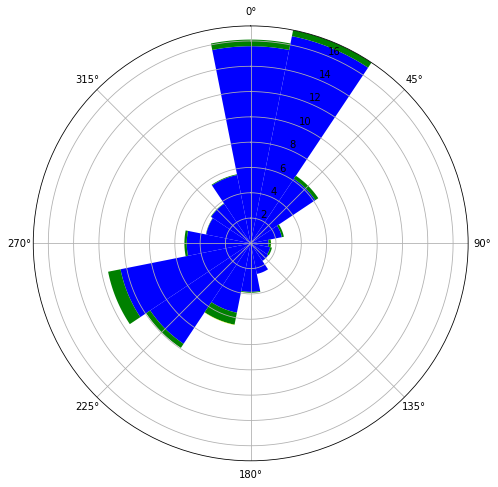

In [6]:
# 極座標平面に風配図を表示
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection='polar')
theta = np.linspace(0, 2*np.pi, 17)[:-1]
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.bar(theta, per[0], width=np.pi/8, color='blue')
ax.bar(theta, per[1], width=np.pi/8, color='green', bottom=per[0])
ax.bar(theta, per[2], width=np.pi/8, color='yellow', bottom=np.sum(per[:2], axis=0))
ax.bar(theta, per[3], width=np.pi/8, color='red', bottom=np.sum(per[:3], axis=0))
plt.show()
plt.close('all')